### Exercise 1

In [1]:
x <- c(15.58, 15.9, 16, 16.1, 16.2)
p1 <- c(0.15, 0.21, 0.35, 0.15, 0.14)
p2 <- c(0.14, 0.05, 0.64, 0.08, 0.09)
df1 <- rbind(x,p1,p2)
df1
#expected values and variance
exp_x_1 <- sum(x*p1)
print(paste("mean p1:", exp_x_1))
exp_x_2 <- sum(x*p2)
print(paste("mean p2:", exp_x_2))

var_1 <- 1/length(x) * sum((x-exp_x_1)^2)
print(paste("variance with p1:", var_1))
var_2 <- 1/length(x) * sum((x-exp_x_2)^2)
print(paste("variance with p2:", var_2))

x,15.58,15.90,16.00,16.10,16.20
p1,0.15,0.21,0.35,0.15,0.14
p2,0.14,0.05,0.64,0.08,0.09


[1] "mean p1: 15.959"
[1] "mean p2: 15.9622"
[1] "variance with p1: 0.045353"
[1] "variance with p2: 0.04538244"


### Exercise 2

[1] 0.00 0.02 0.04 0.06 0.08 0.10 0.12 0.14 0.16 0.18 0.20 0.22 0.24 0.26 0.28
[16] 0.30 0.32 0.34 0.36 0.38 0.40 0.42 0.44 0.46 0.48 0.50 0.52 0.54 0.56 0.58
[31] 0.60 0.62 0.64 0.66 0.68 0.70 0.72 0.74 0.76 0.78 0.80 0.82 0.84 0.86 0.88
[46] 0.90 0.92 0.94 0.96 0.98 1.00

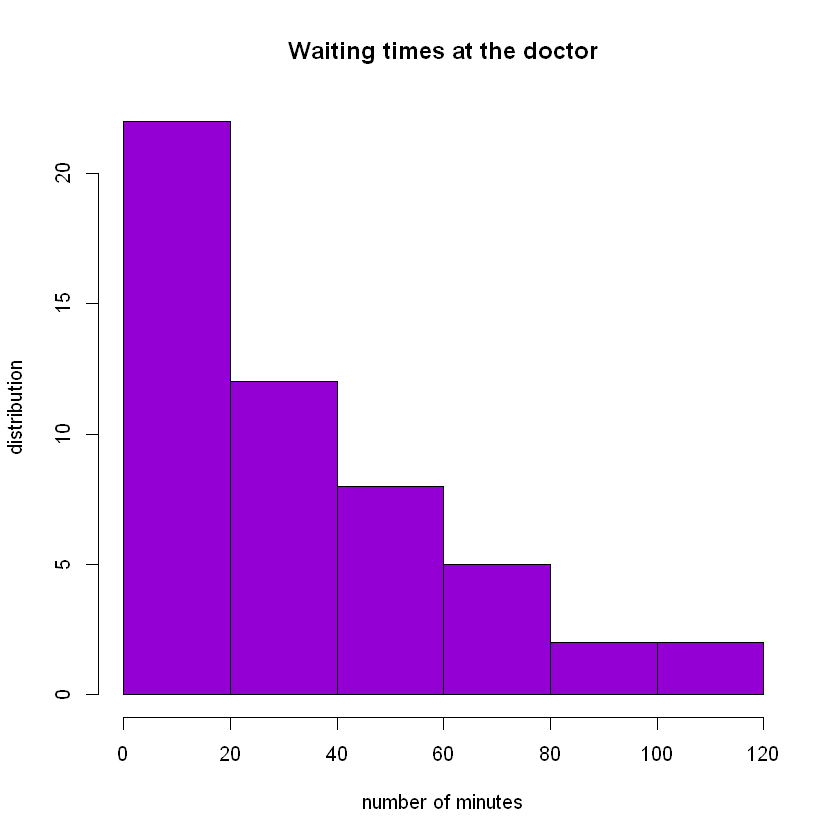

In [2]:
#waiting time:30 mins - exponential pdf w rate 1/30
#A) waiting time for 50 people and plot histogram
lambda <- 1/30
#x <- 0:49
x <- seq(0,1,by =1/50)
x
ap <- rexp(x,lambda)
hist(ap, main="Waiting times at the doctor", xlab="number of minutes", ylab="distribution", col="darkviolet")
#hist(v,main,xlab,xlim,ylim,breaks,col,border)


In [3]:
#B) prob a person will wait less than 10 mins
print("probability of waiting less than ten mins")
pexp(10, lambda)
#C) avg waiting time from simulated data
print("mean of generated data")
mean(ap) #expected value of generated data is smaller than true expected value of 30 mins

#integrate_numerically(ap, -Inf, Inf)
#find_mean(dexp, rate=lambda)

#expected mean is 1/lambda = 30mins

#D) prob waiting more than one hour
print("prob of waiting more than one hour")
1-pexp(60,lambda)

[1] "probability of waiting less than ten mins"


[1] 0.2834687

[1] "mean of generated data"


[1] 31.67955

[1] "prob of waiting more than one hour"


[1] 0.1353353

### Question 3

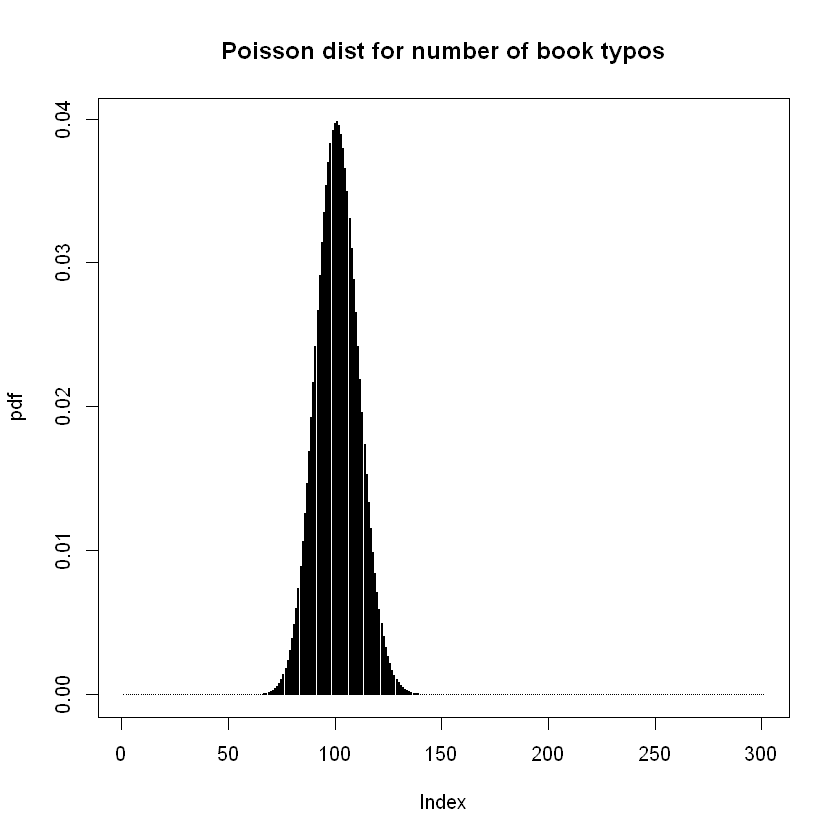

In [4]:
#3 - one typo every 3 pages - poisson dist, plot pdf and cpf
#books normally have 300 ish pages
x <- 0:300 #number of opportunities for an error
lambda <- 1/3 #prob to have an error on the page
mean <- 1/3*length(x)

pdf <- dpois(x, mean)
#pdf

plot(pdf, type="h", lwd=2, main = "Poisson dist for number of book typos")
#lines(cdf, type = "h", lwd=2, col="red")

[1] 0.2834687

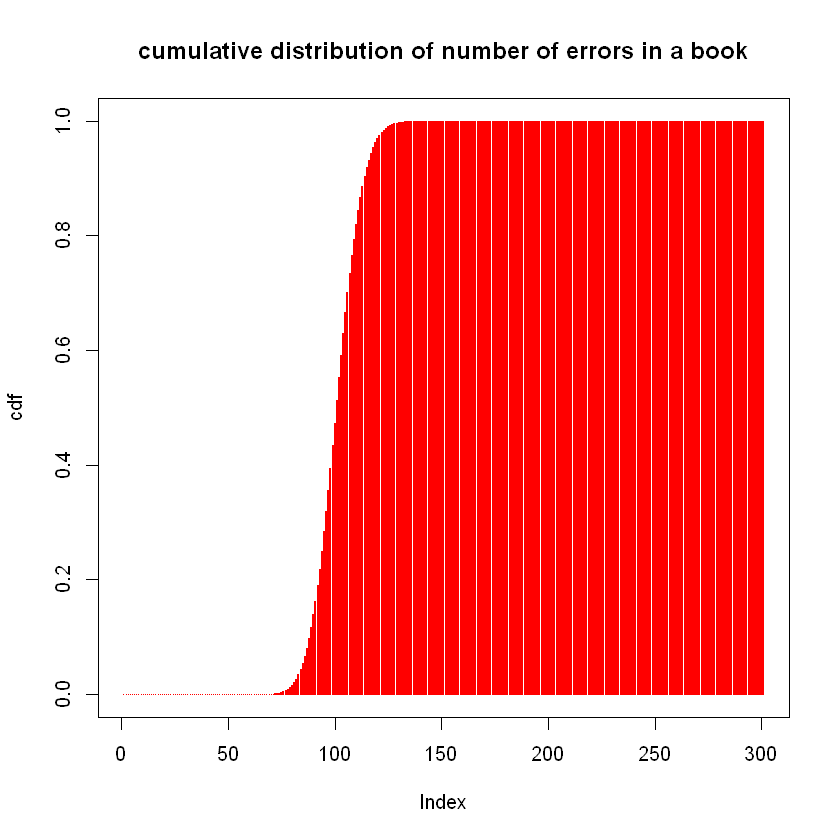

In [5]:
cdf <- ppois(x, mean, log.p=F) # (cumulative)
#cdf
plot(cdf, type = "h", lwd=2, col="red", main="cumulative distribution of number of errors in a book")

#prob of at least one error on the page 
1-dpois(0,lambda)

### Question 4

In [6]:
#4 draw from deck w replacement until one ace found
#what is prob 10 or more draws are needed
#binomial dist 
N <- 52
Ace <- 4
#mean <- n*Ace/N #n attempts
prob <- pbinom(1, 10, 4/52)
print("prob that 10 or more draws are needed:")
1-prob

[1] "prob that 10 or more draws are needed:"


[1] 0.176582

### Question 5 
time for test - density function 

In [7]:
library(dplyr)

dens_func <- function(t) (t-1)*(2-t)

data = data.frame(x = seq(0.5,2.5,by =1/50))
c=6
data$y = with(data, ifelse(x>1 & x<2, 6*(x-1)*(2-x), 0))
sum(data$y)
1/8.33


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



[1] 49.98

[1] 0.120048

In [8]:
dens_func
integrate(dens_func, lower=1, upper=2)

c <- 1/0.166666666
#c value is 6

#integral of 3t-2-t*2 is (-t*3)/3 + 3/2(t*2) - 2t + const
#(-t*3)/3 + 3/2*(t*2) -2*t == 1/c
t=1
a <- (-t^3)/3 + 3/2*(t^2) -2*t
t=2
b <- (-t^3)/3 + 3/2*(t^2) -2*t
a
b

d <- 1/(b-a)
d #c value is 6 (confirmed analytically)

dens_func <- function(t) 6* (t-1)*(2-t)
integrate(dens_func, lower=1, upper=2)

function(t) (t-1)*(2-t)

0.1666667 with absolute error < 1.9e-15

[1] -0.8333333

[1] -0.6666667

[1] 6

1 with absolute error < 1.1e-14

[1] "mean 0.995016996261587"
[1] "standard deviation 0.40107353487791"


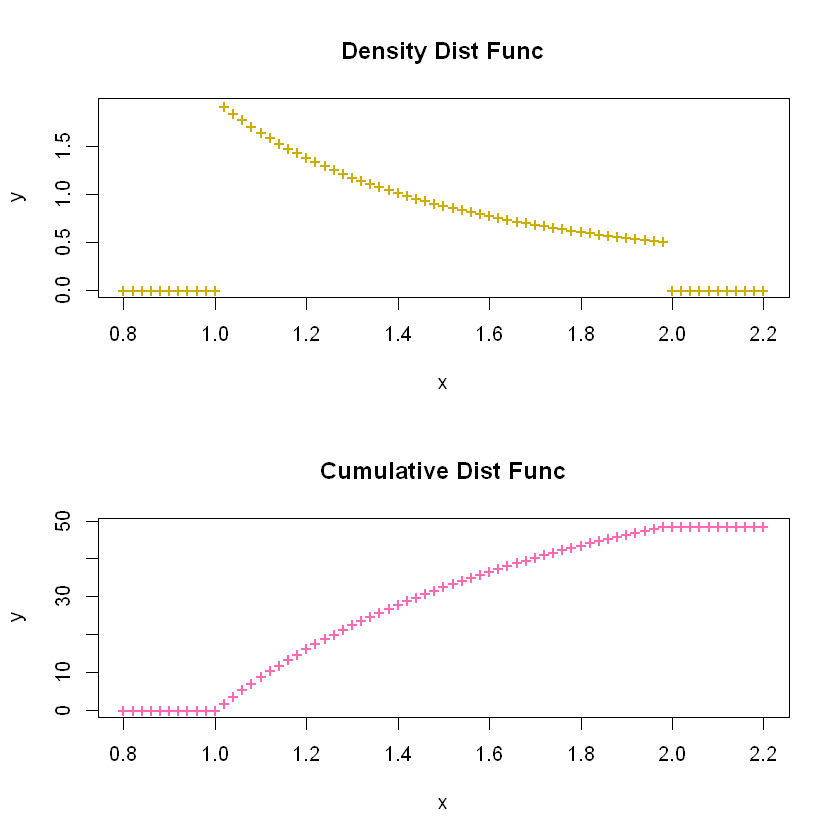

In [16]:
#mean value
print(paste("mean", mean(data$y[data$y != 0])))
#std value
print(paste("standard deviation", sd(data$y[data$y != 0])))
par(mfrow = c(2,1))

#set of functions
df <- function(t) {
    val <-  6* (t-1)*(2-t)
    return(val)
}
#cumulative    
pf <- function(t) {
    val <- -6*(t^3/3-3*t^2/2+2*t)
    return(val)
}
#inverse cumulative
qf <- function(t) {
    val <- function(x) {inverse(pf, lower=1, upper=2)}
    return(val(t))
}
#random value
rf <- function(x) {
    us <- runif(x)
    val <- df(x)
    return(val)
}


#pdf plot
plot(data$x, data$y, col="gold3", pch="+", xlab="x", ylab="y", main="Density Dist Func")
#cdf
plot(data$x, cumsum(data$y), col="hotpink", pch="+", xlab="x", ylab="y", main="Cumulative Dist Func")


In [10]:
#prob to finish in more than 75 mins = 1.25h
integrate(dens_func, lower=1.25, upper=2)
#prob to finish between 90 and 120 mins = 1.5 to 2hrs
integrate(dens_func, lower=1.5, upper=2)

0.84375 with absolute error < 9.4e-15

0.5 with absolute error < 5.6e-15

### Exercise 6


In [11]:
#lifetime of tire 10^4 (x) km
data = data.frame(x = seq(0.8,2.2,by=1/50))
c=6
data$y = with(data, ifelse(x>1 & x<2, 2/(x^2), 0))

[1] "mean 0.995016996261587"
[1] "standard deviation 0.40107353487791"


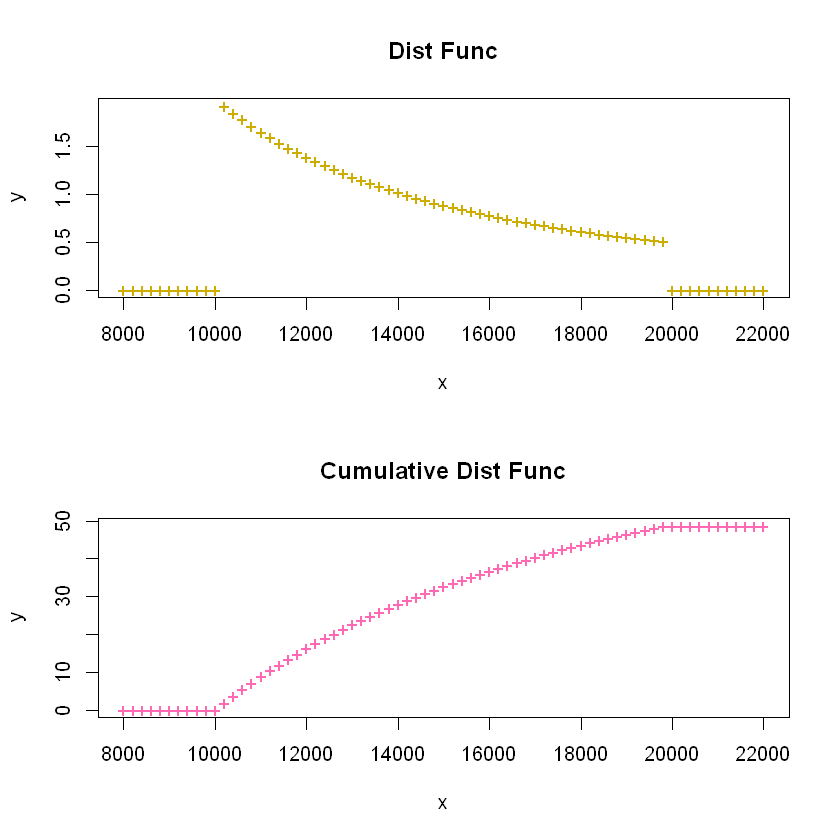

In [17]:
#mean value
print(paste("mean", mean(data$y[data$y != 0])))
#std value
print(paste("standard deviation", sd(data$y[data$y != 0])))
par(mfrow = c(2,1))

#set of functions
df <- function(t) {
    val <-  ifelse(x<2 && x >1, 2/x^2, 0)
    return(val)
}
#cumulative    
pf <- function(t) {
    val <- ifelse(x<2 && x >1, -2/x, 0)
    return(val)
}
#inverse cumulative
qf <- function(t) {
    val <- function(x) {inverse(pf, lower=1, upper=2)}
    return(val(t))
}
#random value
rf <- function(x) {
    us <- runif(x)
    val <- df(x)
    return(val)
}


#pdf plot
plot(data$x*10^4, data$y, col="gold3", pch="+", xlab="x", ylab="y", main="Dist Func")
#cdf
plot(data$x*10^4, cumsum(data$y), col="hotpink", pch="+", xlab="x", ylab="y", main="Cumulative Dist Func")


In [13]:
#prob last less than 15000 km
tirelifetime <- function(x) {
    return(2/x^2)
}
integrate(tirelifetime, lower=1, upper=1.5)
#66% probability of less than 15000 km

0.6666667 with absolute error < 7.4e-15

In [14]:
#c) sample 3000 random vars from dist to determine mean and var 
x_vals <- sample(seq(1,2,by=1/7000), size=3000, replace =T)
#x_vals
dist_vals <- tirelifetime(x_vals)
print("mean")
mean(dist_vals)
var <- mean(dist_vals^2) - (mean(dist_vals)^2)
print("variance")
var

##check##
print("check")
sqrt(var)
sd(dist_vals)

[1] "mean"


[1] 1.002662

[1] "variance"


[1] 0.1634728

[1] "check"


[1] 0.4043177

[1] 0.4043851